In [2]:
import numpy as np #mathemnatical operations
import pandas as pd #dataframe
import matplotlib.pyplot as plt #visualisation base library
import seaborn as sns #an upper level visualisation library
import io

In [4]:
df_ = pd.read_csv('TelcoCustomer.csv', delimiter=";") #sep could be ",""|"
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.describe().T #Transpose makes better

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Let's make this automized and write the function as df_detailed:

In [9]:
def df_detailed(dataframe):
    print("************Shape**************")
    print(dataframe.shape)
    print("************Types**************")
    print(dataframe.dtypes)
    print("************Head**************")
    print(dataframe.head())
    print("************Tail**************")
    print(dataframe.tail())
    print("************NA**************")
    print(dataframe.isnull().sum())
    print("************Counts**************")
    print(dataframe.count(1))
    print("************Unique**************")
    print(dataframe.nunique())
    print("************Quantiles**************")
    print(dataframe.describe().T)

In [10]:
df_detailed(df)

************Shape**************
(7043, 21)
************Types**************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
************Head**************
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No        

In [21]:
df = df.replace(r'^\s*$', np.nan, regex=True) #we convert EMPTY values to NA

In [22]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

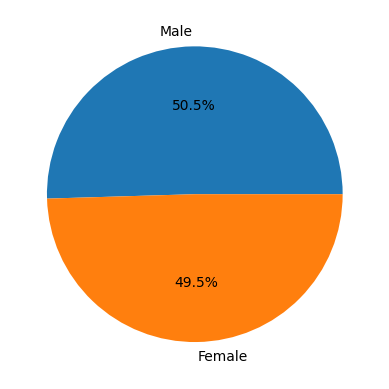

In [11]:
plt.pie(df.gender.value_counts().values,[0,0],["Male","Female"],autopct="%1.1f%%")
plt.show()

In [12]:
df.gender.value_counts(1)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

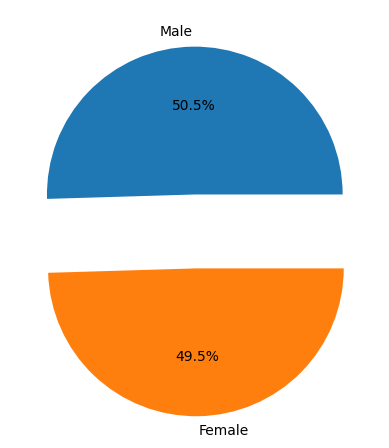

In [13]:
labels=df.gender.value_counts().index
sizes=df.gender.value_counts().values
explode=[0,0.5]

plt.pie(sizes,explode,labels,autopct="%1.1f%%")
plt.show()     #Funny:D

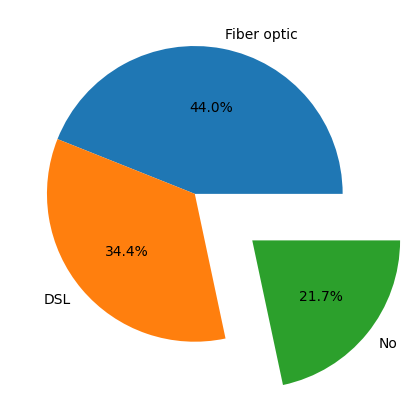

In [14]:
labels=df.InternetService.value_counts().index
sizes=df.InternetService.value_counts().values
explode=[0,0,0.5]

plt.pie(sizes,explode,labels,autopct="%1.1f%%")
plt.show()

In [15]:
df.OnlineSecurity.value_counts(1)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

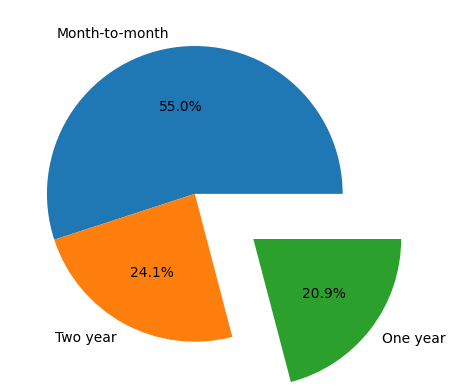

In [16]:
labels=df.Contract.value_counts().index
sizes=df.Contract.value_counts().values
explode=[0,0,0.5]

plt.pie(sizes,explode,labels,autopct="%1.1f%%")
plt.show()

In [17]:
df.PaymentMethod.value_counts(1)


Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [18]:
df.groupby("PaymentMethod").agg({"MonthlyCharges":["mean"]})

,MonthlyCharges
,mean
PaymentMethod,
Bank transfer (automatic),67.192649
Credit card (automatic),66.512385
Electronic check,76.255814
Mailed check,43.917060


In [23]:
df.groupby("PaymentMethod").agg({"TotalCharges":["mean"]})

,TotalCharges
,mean
PaymentMethod,
Bank transfer (automatic),3079.299546
Credit card (automatic),3071.396022
Electronic check,2090.868182
Mailed check,1054.483915


Churn Percentages

In [24]:
df["Churn"].value_counts(1) #for giving percentages

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [25]:
df["Churn_Ind"] = df['Churn'].apply(lambda x:1 if x=="Yes" else 0)

In [26]:
df["Churn_Ind"].mean()

0.2653698707936959

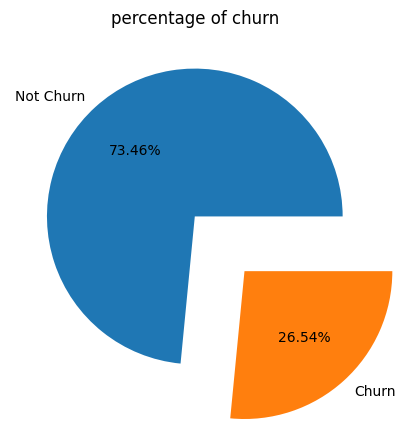

In [27]:
plt.pie(df["Churn"].value_counts().values,explode=[0,0.5], labels=["Not Churn","Churn"], autopct="%.2f%%") #explode=[0,0.5] how much they separated
plt.title("percentage of churn")

plt.show()

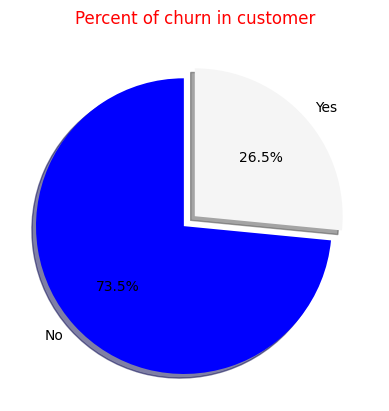

In [28]:
#Data to plot
labels = df["Churn"].value_counts().index
sizes = df["Churn"].value_counts()

colors = ["blue", "whitesmoke"]
explode = (0.1,0) #explode 1st slice

plt.pie(sizes,explode,labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=90)
plt.title("Percent of churn in customer", color="Red")
plt.show()

Contract Type

In [29]:
df.groupby(["Contract"])[["MonthlyCharges"]].mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


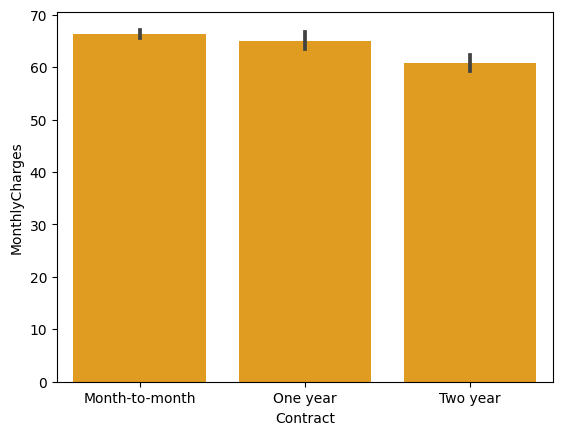

In [30]:
sns.barplot(x=df["Contract"], y=df['MonthlyCharges'], color="orange")
plt.show()

In [31]:
df.groupby(["Contract","Churn"])[["MonthlyCharges"]].mean()

MonthlyCharges
Contract       Churn                
Month-to-month No          61.462635
               Yes         73.019396
One year       No          62.508148
               Yes         85.050904
Two year       No          60.012477
               Yes         86.777083

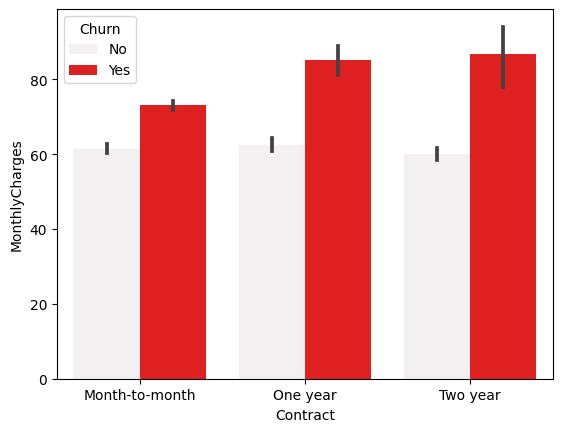

In [32]:
sns.barplot(x=df["Contract"], y=df['MonthlyCharges'], hue=df["Churn"], color="red")
plt.show()

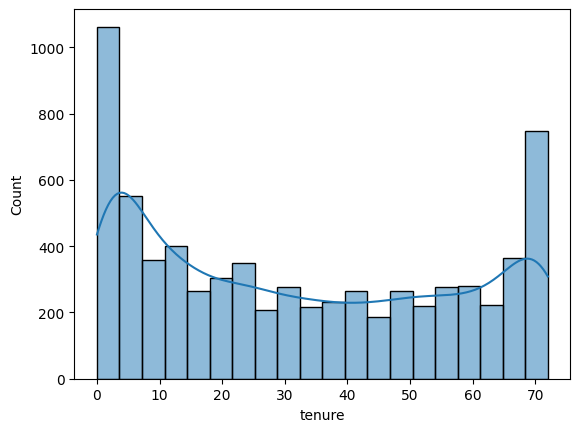

In [33]:
sns.histplot(df["tenure"], bins = 20, kde = 1)
plt.show()

In [34]:
pd_hist = pd.DataFrame(np.histogram(df["tenure"], bins=20), index = ["n","bins"])

In [35]:
pd_hist

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
n,1062.0,550.0,358.0,401.0,266.0,304.0,348.0,208.0,278.0,217.0,...,264.0,186.0,266.0,218.0,277.0,279.0,222.0,363.0,746.0,NaN
bins,0.0,3.6,7.2,10.8,14.4,18.0,21.6,25.2,28.8,32.4,...,39.6,43.2,46.8,50.4,54.0,57.6,61.2,64.8,68.4,72.0


Monthly Charges Analysis

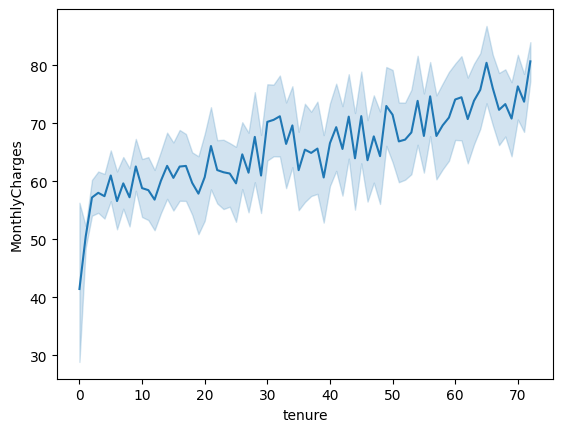

In [36]:
sns.lineplot(data=df, x="tenure", y="MonthlyCharges")
plt.show()

In [37]:
df.InternetService.value_counts(1)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

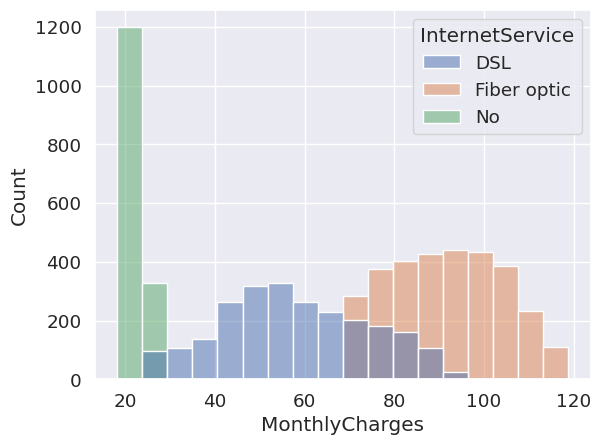

In [48]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(data=df, x="MonthlyCharges", hue="InternetService") #With hist plot we can observe the frequency for numerical variables
plt.show()

Payment Method Analysis

In [39]:
pd.crosstab(df["PaymentMethod"],df["Contract"])

Contract,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer (automatic),589,391,564
Credit card (automatic),543,398,581
Electronic check,1850,347,168
Mailed check,893,337,382


<function matplotlib.pyplot.show(close=None, block=None)>

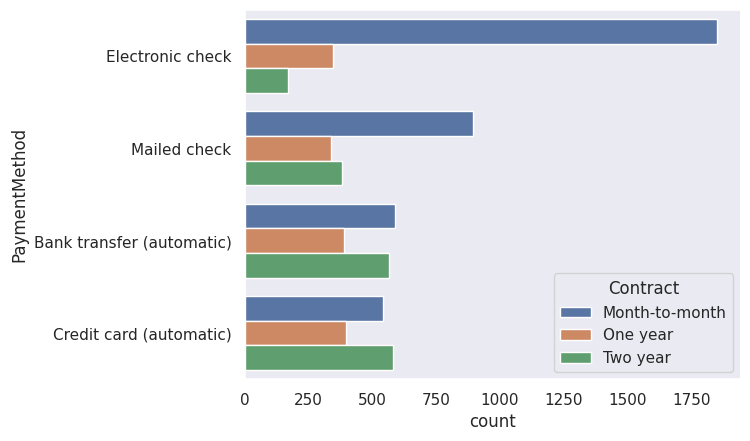

In [45]:
sns.set_theme(style="dark")    #sns.set_theme(style="whitegrid") darkgrid, white grid, dark, white and ticks
sns.countplot(y=df["PaymentMethod"], hue=df["Contract"]) #palette={"Month-to-month": "steelblue", "One year": "lightseagreen", "Two year": "lavender"}
plt.show()

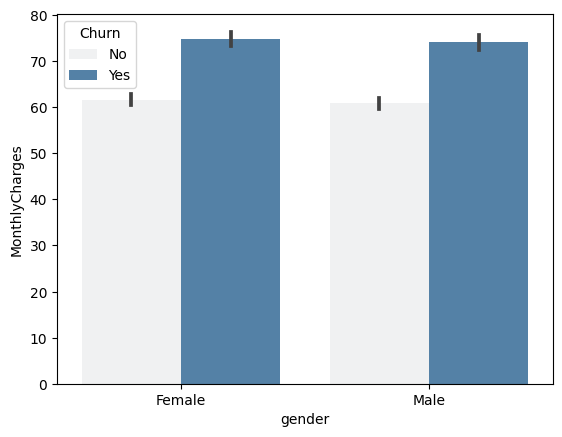

In [41]:
sns.barplot(x=df["gender"], y=df["MonthlyCharges"], hue=df["Churn"], color = "steelblue")
plt.show()

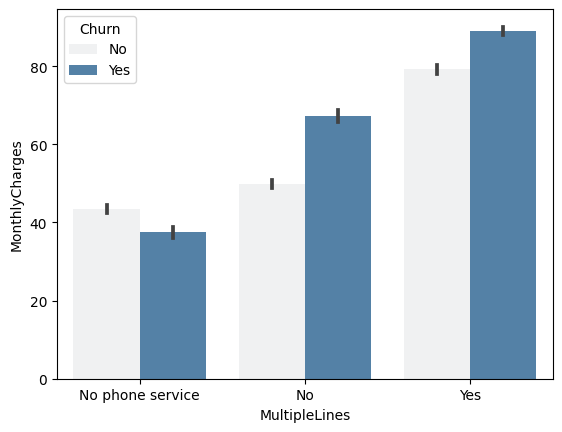

In [42]:
sns.barplot(x=df["MultipleLines"], y=df["MonthlyCharges"], hue=df["Churn"], color = "steelblue")
plt.show()

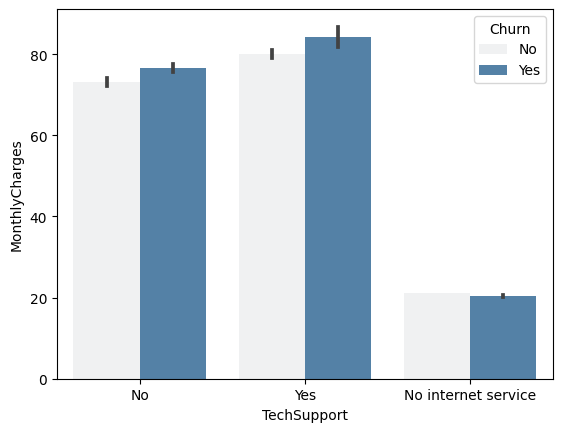

In [43]:
sns.barplot(x=df["TechSupport"], y=df["MonthlyCharges"], hue=df["Churn"], color = "steelblue")
plt.show()

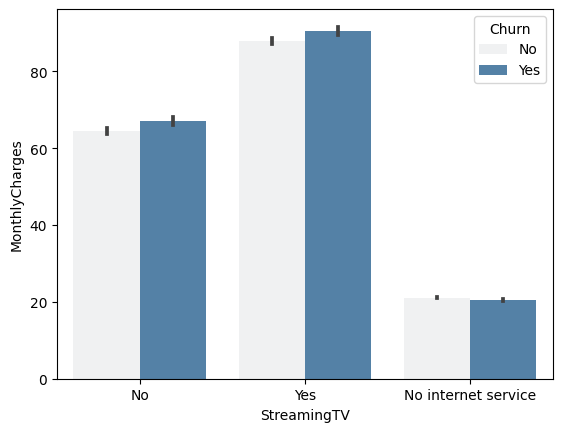

In [44]:
sns.barplot(x=df["StreamingTV"], y=df["MonthlyCharges"], hue=df["Churn"], color = "steelblue")
plt.show()

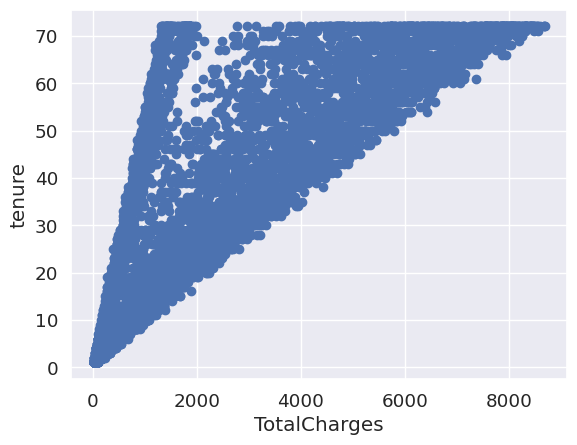

In [53]:
#Scatter Plot with matplotlib
plt.scatter(df["TotalCharges"], df["tenure"])
plt.xlabel("TotalCharges")
plt.ylabel("tenure")
plt.show()

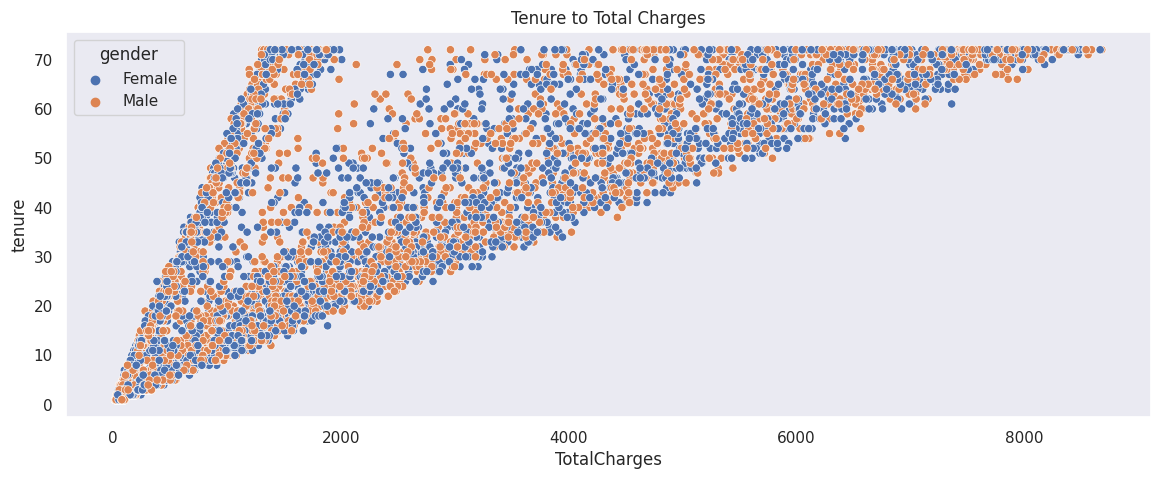

In [58]:
#Scatter Plot with sns
plt.figure(figsize=(14, 5))
sns.set_theme(font_scale=1.2)
sns.set_theme(style="dark")


sns.scatterplot(data=df,
                x="TotalCharges",
                y="tenure",
                hue="gender"
               )

plt.title("Tenure to Total Charges")
plt.show()

In [65]:
df_=sns.load_dataset("car_crashes")
df = df_.copy()
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<ipython-input-76-cccb1ec4c248>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=3) #linewidths seperation between boxes,  try for cmap="YlGnBu"


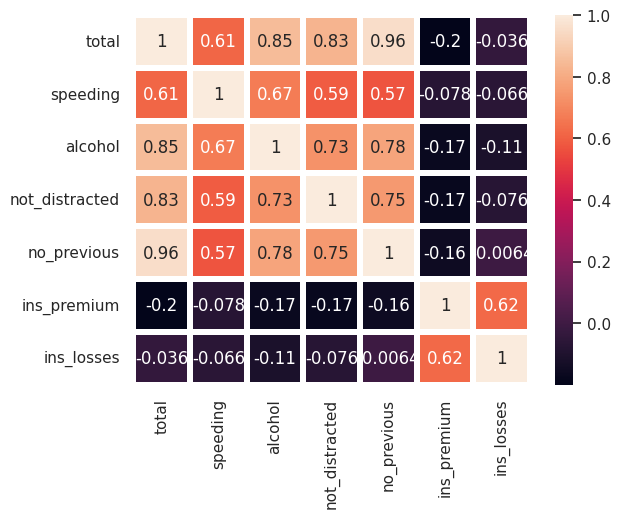

In [76]:
#Heatmap
sns.heatmap(df.corr(), annot = True, linewidths=3) #linewidths seperation between boxes,  try for cmap="YlGnBu"
plt.show()

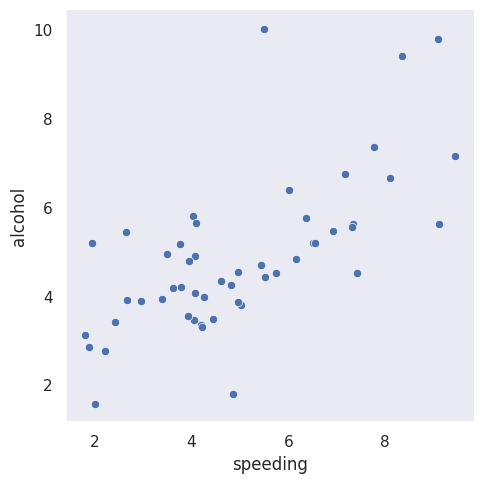

In [62]:
#relplot
sns.relplot(data=df, x="speeding", y="alcohol")
p

In [67]:
tips = sns.load_dataset('tips')

<Figure size 1400x1000 with 0 Axes>

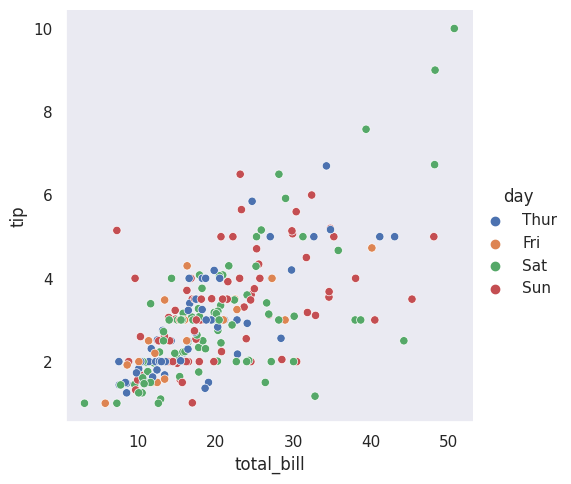

In [68]:
plt.figure(figsize=(14, 10))
sns.relplot(data=tips, x="total_bill", y="tip", hue="day");
plt.show()

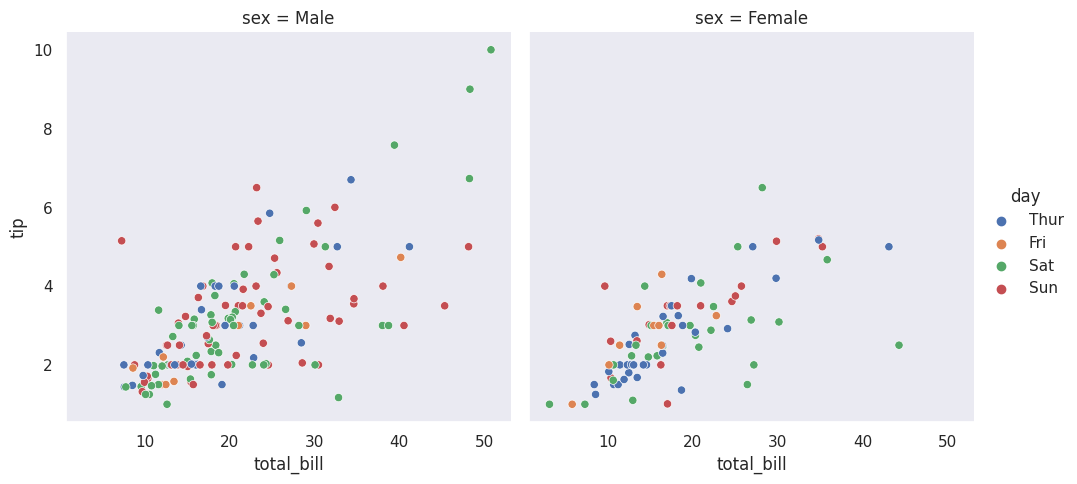

In [71]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="sex")
plt.show()

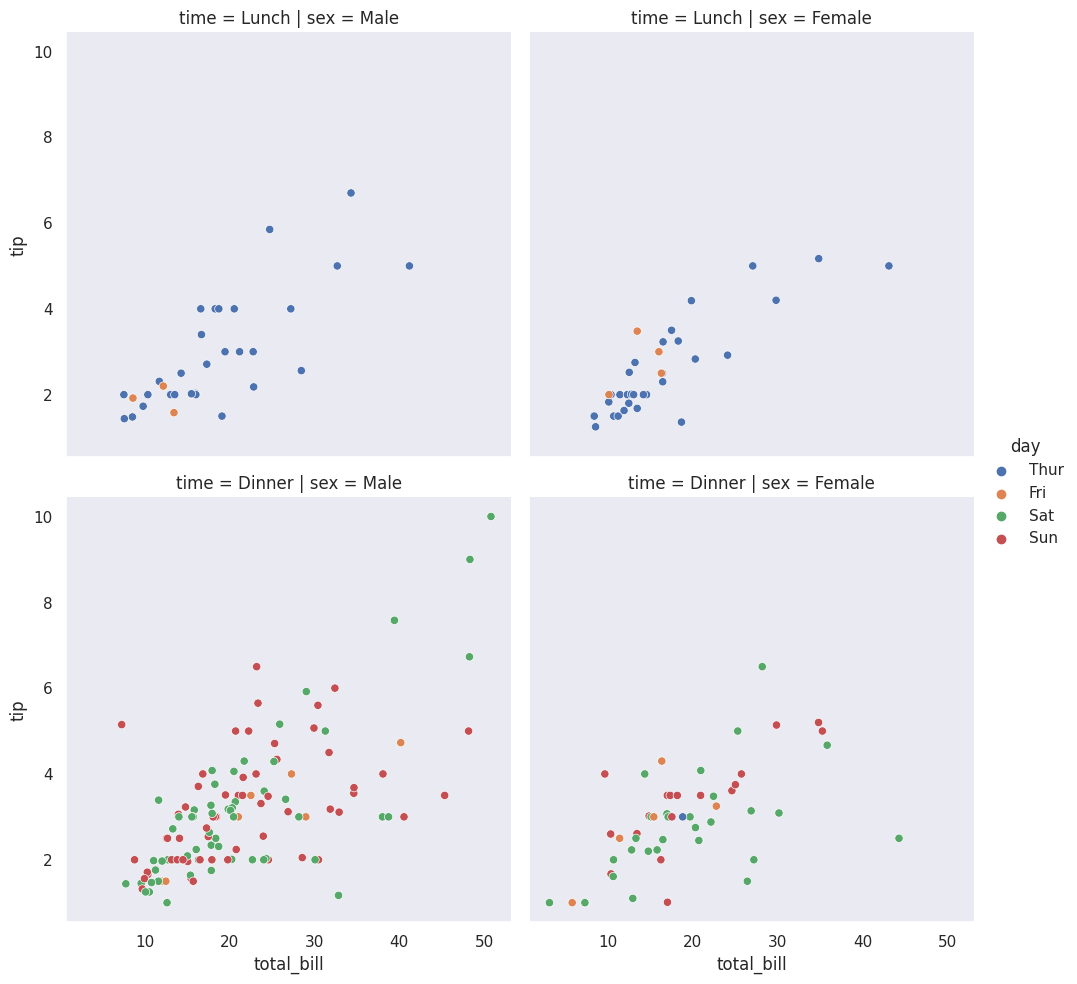

In [72]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="sex", row="time")

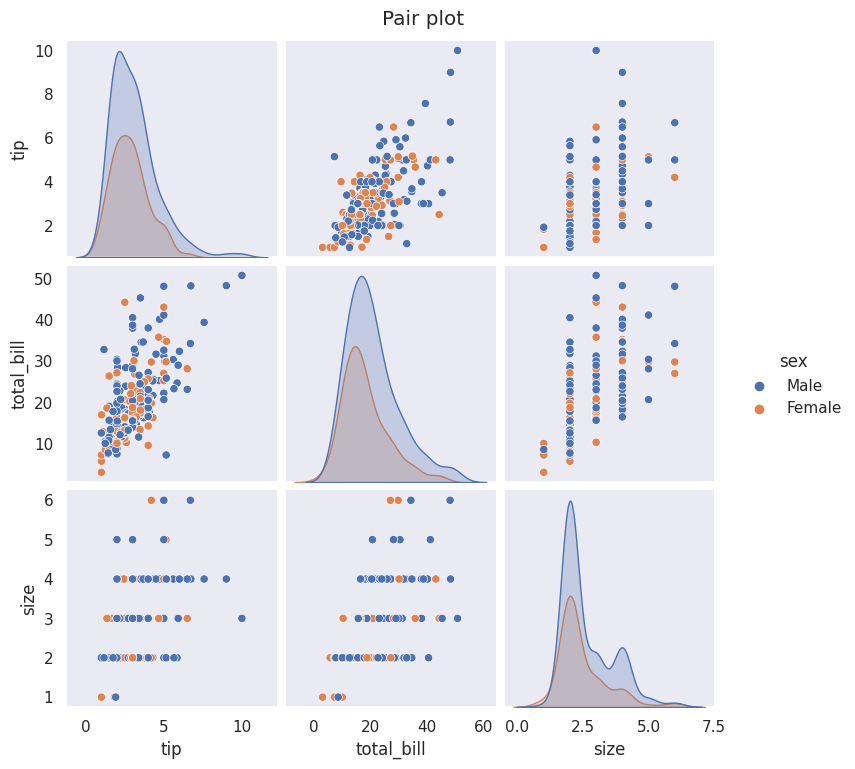

In [73]:
#Pairplot

sns.pairplot(data=tips,
             vars = ["tip", "total_bill", "size"],
             diag_kind="kde",
             hue="sex"
             )

plt.suptitle("Pair plot", y=1.02)   # adds title to the plot
plt.show()